# PCA with KNN 실습 5. MINST dataset

> MNIST(Modified National Institute of Standards and Technology) Dataset

- 필기체 인식을 위해 수집한 데이터 셋에서 숫자만 모아놓은 것이다.

- 28×28 픽셀(pixel, picture element약자)의 0~9 사이의 숫자 이미지와 레이블로 구성된 셋

- 6만 개의 훈련용 셋과 1만 개의 테스트용 셋으로 구성되어 있다.



</br>

### --▶ Dataset Load

- [Kaggle MNIST in csv](https://www.kaggle.com/datasets/oddrationale/mnist-in-csv/data)

In [1]:
import pandas as pd

df_train = pd.read_csv("D:\zbDS\Project\Part7_ML\dataset\mnist_train.csv")
df_test = pd.read_csv("D:\zbDS\Project\Part7_ML\dataset\mnist_test.csv")

df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [4]:
df_train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### --▶ Data 정리

In [5]:
import numpy as np

X_train = np.array(df_train.iloc[:, 1:])
y_train = np.array(df_train['label'])

X_test = np.array(df_test.iloc[:, 1:])
y_test = np.array(df_test['label'])

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

### --▶ Data 확인

- 데이터가 어떻게 생겼는지 랜덤하게 16개만 확인해본다.

In [6]:
import random

samples = random.choices(population=range(0, 60000), k=16)
print(samples)

[213, 5169, 31102, 5590, 56138, 26981, 44953, 50735, 44098, 47328, 59134, 3920, 8973, 52165, 51394, 29740]


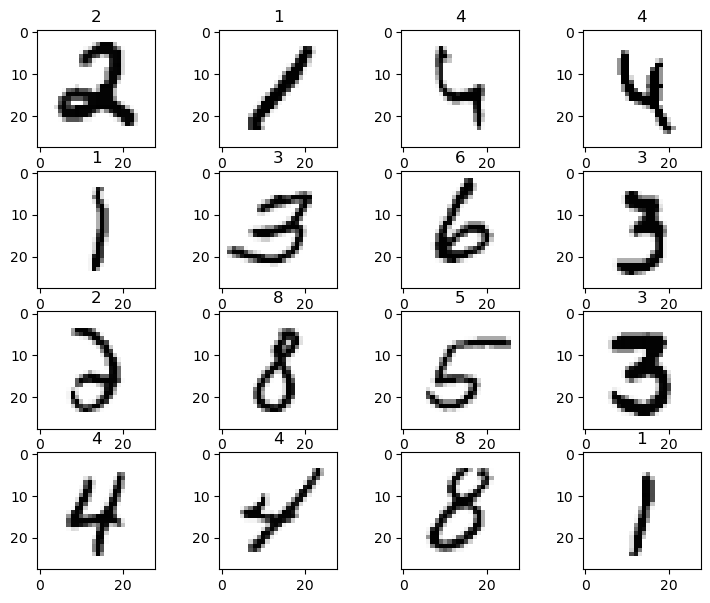

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,7))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_train[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title(y_train[n])

plt.show()

### --▶ KNN fit() & predict()

- KNN은 모든 차원에서 거리를 계산해야 하기 때문에 28 by 28의 784차원, 6만 개 데이터 연산량은 어마어마하다.

- 이것이 바로 KNN의 "차원의 저주"이다.

In [9]:
%%time

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

CPU times: total: 281 ms
Wall time: 291 ms


KNeighborsClassifier()

In [11]:
%%time

from sklearn.metrics import accuracy_score

pred = knn_clf.predict(X_test) #--> Test Data Predict
accuracy_score(y_test, pred)

CPU times: total: 1min
Wall time: 27.6 s


0.9688

### --▶ PCA로 차원 축소

In [12]:
from sklearn.pipeline import  Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipe = Pipeline([
	('pca', PCA()),
	('clf', KNeighborsClassifier())
])

params = dict(
	pca__n_components = [2, 5, 10],
	clf__n_neighbors = [5, 10, 15]
)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)
grid = GridSearchCV(pipe, param_grid=params, cv=kfold, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=13, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('clf', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'clf__n_neighbors': [5, 10, 15],
                         'pca__n_components': [2, 5, 10]},
             verbose=1)

In [15]:
print("Best score : %0.3f" % grid.best_score_)
print("Best parameters set:")
best_parameters = grid.best_estimator_.get_params()
for param_name in sorted(params.keys()):
    print("\t%s : %r" % (param_name, best_parameters[param_name]))

Best score : 0.931
Best parameters set:
	clf__n_neighbors : 10
	pca__n_components : 10


In [16]:
pred = grid.best_estimator_.predict(X_test)
accuracy_score(y_test, pred)

0.9289

### --▶ Result 확인

#### ◾ 오차 행렬

In [17]:
# 결과 확인
def results(y_pred, y_test):
    from sklearn.metrics import classification_report, confusion_matrix
    print(classification_report(y_test, y_pred))

results(grid.predict(X_train), y_train)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5923
           1       0.98      0.99      0.98      6742
           2       0.96      0.96      0.96      5958
           3       0.94      0.90      0.92      6131
           4       0.94      0.93      0.93      5842
           5       0.93      0.94      0.93      5421
           6       0.96      0.98      0.97      5918
           7       0.96      0.95      0.96      6265
           8       0.92      0.91      0.91      5851
           9       0.90      0.91      0.90      5949

    accuracy                           0.94     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      0.94      0.94     60000



#### ◾ 숫자 확인

In [27]:
print(X_test[700])
X_test[700].shape

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 139 255 254 174   9   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 139 253
 253 253  22   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 139 253 253 253  22   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   4 239 253 253  79   0   0   0   0   0   0   0   

(784,)

In [29]:
print(X_test[700].reshape(1, 784))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0 139 255 254 174   9   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 139 253
  253 253  22   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0 139 253 253 253  22   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    4 239 253 253  79   0   0   0   0 

In [31]:
print(X_test[:2])
X_test.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(10000, 784)

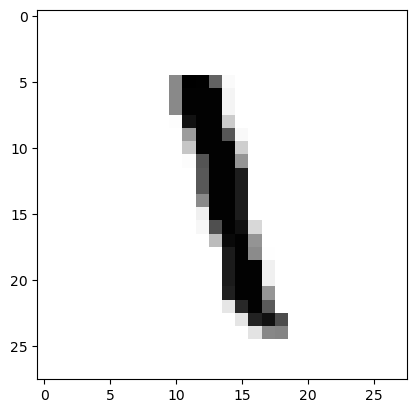

Answer is : [1]
Real Label is : 1


In [21]:
n = 700
plt.imshow(X_test[n].reshape(28,28), cmap="Greys", interpolation='nearest')
plt.show()

print("Answer is :", grid.best_estimator_.predict(X_test[n].reshape(1, 784)))
print("Real Label is :", y_test[n])

#### ◾ 틀린 데이터 확인

In [22]:
preds = grid.best_estimator_.predict(X_test)
preds

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

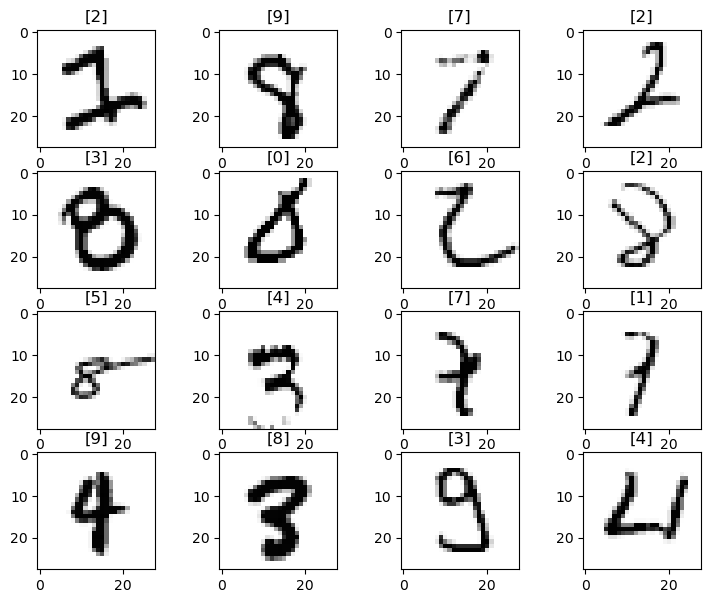

In [32]:
wrong_results = X_test[y_test != pred]
samples = random.choices(population=range(0, wrong_results.shape[0]), k=16)

plt.figure(figsize=(9,7))

for idx, n in enumerate(samples):
    plt.subplot(4,4, idx+1)
    plt.imshow(wrong_results[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    # plt.title(grid.best_estimator_.predict(wrong_results[n].reshape(1,784))[0])
    pred_digit = grid.best_estimator_.predict(wrong_results[n].reshape(1,784))
    plt.title(str(pred_digit))

plt.show()